In [1]:
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('SolarPrediction.csv', header=0)
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
count,3.268600e+04,32686,32686,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686,32686
unique,NaN,118,8299,NaN,NaN,NaN,NaN,NaN,NaN,51,56
top,NaN,12/1/2016 12:00:00 AM,16:20:18,NaN,NaN,NaN,NaN,NaN,NaN,06:11:00,17:42:00
freq,NaN,288,24,NaN,NaN,NaN,NaN,NaN,NaN,1399,3682
mean,1.478047e+09,NaN,NaN,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,NaN,NaN
std,3.005037e+06,NaN,NaN,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,NaN,NaN
min,1.472724e+09,NaN,NaN,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,NaN,NaN
25%,1.475546e+09,NaN,NaN,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,NaN,NaN
50%,1.478026e+09,NaN,NaN,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,NaN,NaN
75%,1.480480e+09,NaN,NaN,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,NaN,NaN


пустых ячеек нет, но есть выбросы во влажности, а также в колонках Data, Time, TimeSunRise, TimeSunSet не числовые данные

In [ ]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


АНАЛИЗ

в колонке с радиацей больше всего выбросов

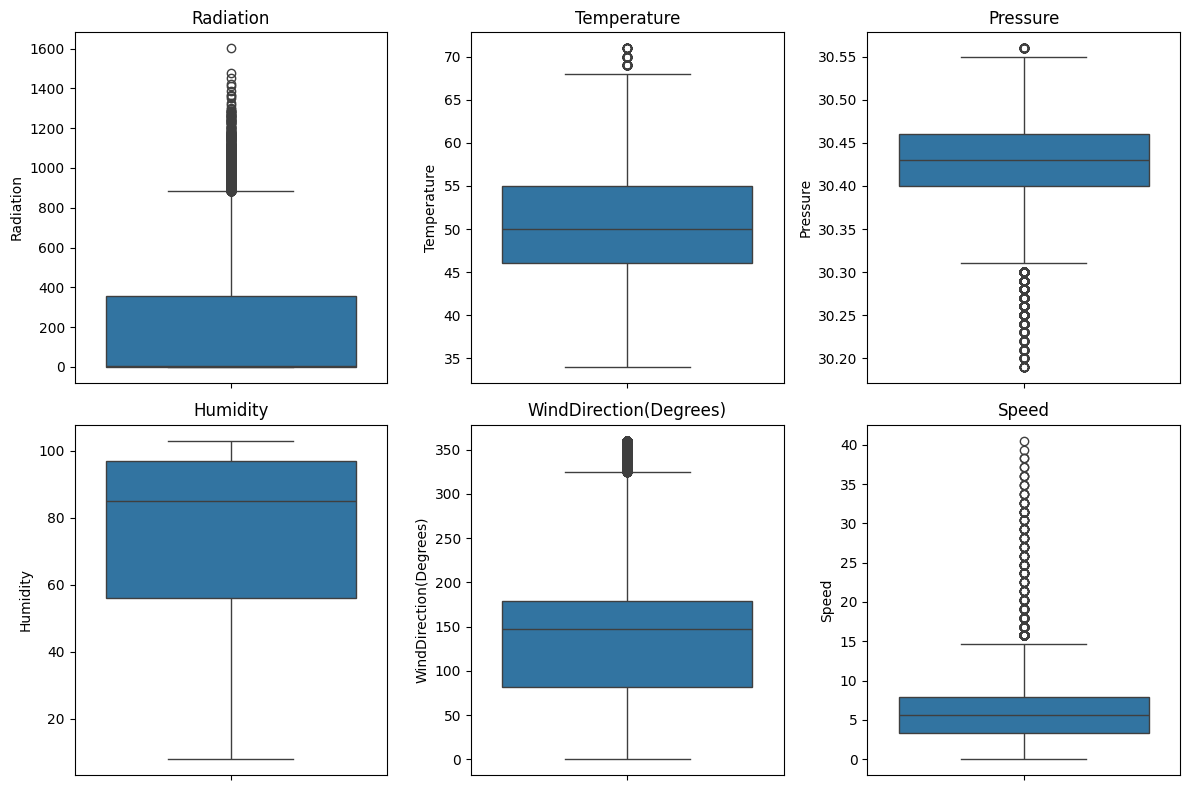

In [ ]:
numerical_columns = ["Radiation", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# обработка данных
преобразование data в колонки день месяц год;

time в секунды минуты часы;


UNIXTime не имеет смысла, т.к. слишком большое число, лучше искать зависимость от года/месяца/дня;


убираем влажность >100

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

df['Data'] = pd.to_datetime(df['Data'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df['Year'] = df['Data'].dt.year
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)
df['SunDuration'] = (pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S') - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')).dt.total_seconds()/3600

df = df[df['Humidity'] <= 100]

df_cleaned = df.drop(columns=['Data', 'Time', 'UNIXTime', 'TimeSunRise', 'TimeSunSet'])

In [43]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 28375 entries, 0 to 32663
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                28375 non-null  int64         
 1   Data                    28375 non-null  datetime64[ns]
 2   Time                    28375 non-null  object        
 3   Radiation               28375 non-null  float64       
 4   Temperature             28375 non-null  int64         
 5   Pressure                28375 non-null  float64       
 6   Humidity                28375 non-null  int64         
 7   WindDirection(Degrees)  28375 non-null  float64       
 8   Speed                   28375 non-null  float64       
 9   TimeSunRise             28375 non-null  object        
 10  TimeSunSet              28375 non-null  object        
 11  Year                    28375 non-null  int32         
 12  Month                   28375 non-null  int32      

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Day,Hour,Minute,SunDuration
count,2.837500e+04,28375,28375,28375.000000,28375.000000,28375.000000,28375.000000,28375.000000,28375.000000,28375,28375,28375.0,28375.000000,28375.000000,28375.000000,28375.000000,28375.000000
unique,NaN,NaN,8022,NaN,NaN,NaN,NaN,NaN,NaN,51,56,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,16:20:18,NaN,NaN,NaN,NaN,NaN,NaN,06:11:00,17:42:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,1309,2996,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.478040e+09,2016-11-01 00:49:22.720705024,NaN,226.296773,51.394432,30.424087,70.980194,145.634749,6.393540,NaN,NaN,2016.0,10.530044,15.612652,11.402291,27.569974,11.512158
min,1.472744e+09,2016-09-01 00:00:00,NaN,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,NaN,NaN,2016.0,9.000000,1.000000,0.000000,0.000000,10.933333
25%,1.475426e+09,2016-10-02 00:00:00,NaN,1.230000,46.000000,30.400000,50.000000,84.285000,4.500000,NaN,NaN,2016.0,10.000000,8.000000,6.000000,15.000000,11.016667
50%,1.478168e+09,2016-11-03 00:00:00,NaN,3.350000,50.000000,30.430000,80.000000,152.150000,5.620000,NaN,NaN,2016.0,11.000000,16.000000,11.000000,30.000000,11.366667
75%,1.480626e+09,2016-12-01 00:00:00,NaN,414.715000,56.000000,30.460000,93.000000,181.160000,7.870000,NaN,NaN,2016.0,12.000000,23.000000,17.000000,45.000000,11.933333
max,1.483265e+09,2016-12-31 00:00:00,NaN,1601.260000,71.000000,30.560000,100.000000,359.950000,40.500000,NaN,NaN,2016.0,12.000000,31.000000,23.000000,57.000000,12.516667


1) определение зависимости
2) масштабирование данных
3) разделение на обучающую и тестовую выборки
4) обучение
5) результат и оценка.

MSE - метрика измеряет средний квадрат разницы между реальными и предсказанными значениями.
rmse - отклонения от radiation, корень mse
r^2 - коэффициент детерминации
r^2 = 1 -> идеальное совпадение с проверочными данными
r^2 = 0 -> простое усреднение
r^2 < 0 хуже усреднения

In [51]:
X = df_cleaned.drop(columns=['Radiation'])
y = df_cleaned['Radiation']

#scaler = MinMaxScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)

y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean Absolute Error: 150.80820064605805
Mean Squared Error: 38848.74257382754
R2 score: 0.6374543211734769
